In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
xtrain = pd.read_parquet("../data/xtrain.parquet")
ytrain = pd.read_parquet("../data/ytrain.parquet")['fatality']
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")['fatality']
xtrain_smote = pd.read_parquet("../data/xtrain_smote.parquet")
ytrain_smote = pd.read_parquet("../data/ytrain_smote.parquet")['fatality']

In [16]:
clf = RandomForestClassifier(n_jobs=3, random_state=0)
clf.fit(xtrain, ytrain)

RandomForestClassifier(n_jobs=3, random_state=0)

In [17]:
with open('../models/RandomForest.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [4]:
# Para no tener que ejecutar, saltarse el fit y ejecutar a partir de aquí
with open('../models/RandomForest.pickle', 'rb') as f:
    clf = pickle.load(f)

In [7]:
ypred = clf.predict(xtest)
ypred_proba = clf.predict_proba(xtest)

In [8]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

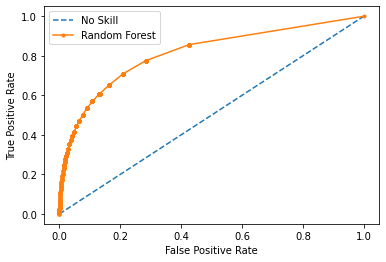

Best Threshold=0.022500, G-Mean=0.749


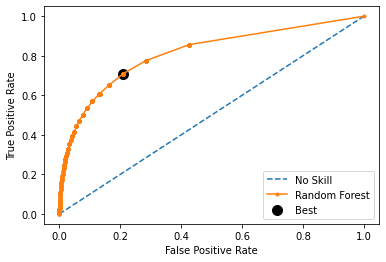

ROC-AUC score of the model: 0.8128552353403422
Accuracy of the model: 0.788752909436895

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    997197
           1       0.05      0.71      0.09     15456

    accuracy                           0.79   1012653
   macro avg       0.52      0.75      0.49   1012653
weighted avg       0.98      0.79      0.87   1012653


Confusion matrix: 
[[787763 209434]
 [  4486  10970]]



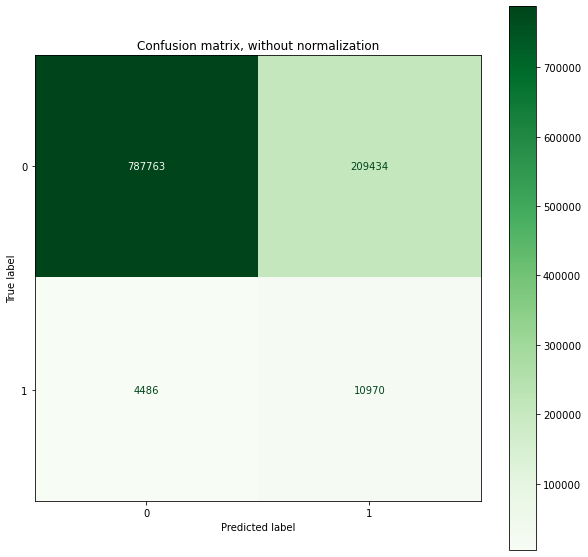

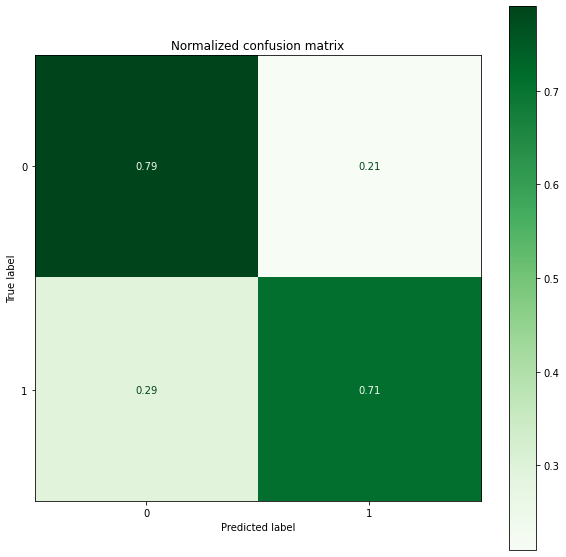

In [30]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

ypred_new_threshold = (ypred_proba[:,1]>thresholds[ix]).astype(int)
evaluate_model(ytest,ypred_new_threshold,ypred_proba)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred_new_threshold,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax = ax)
    ax.set_title(title)

# Random-Forest con SMOTE

In [21]:
clf = RandomForestClassifier(n_jobs=3, random_state=0)
clf.fit(xtrain_smote, ytrain_smote)

RandomForestClassifier(n_jobs=3, random_state=0)

In [22]:
with open('../models/RandomForest_smote.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [19]:
# Para no tener que ejecutar, saltarse el fit y ejecutar a partir de aquí
with open('../models/RandomForest_smote.pickle', 'rb') as f:
    clf = pickle.load(f)

In [20]:
ypred = clf.predict(xtest)
ypred_proba = clf.predict_proba(xtest)

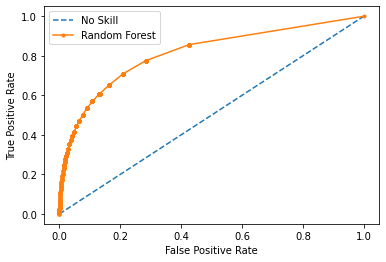

Best Threshold=0.022500, G-Mean=0.749


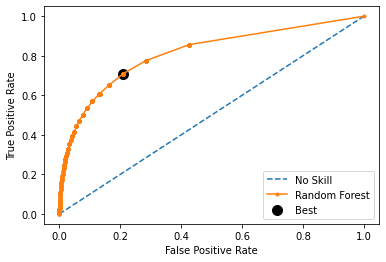

ROC-AUC score of the model: 0.8128552353403422
Accuracy of the model: 0.788752909436895

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    997197
           1       0.05      0.71      0.09     15456

    accuracy                           0.79   1012653
   macro avg       0.52      0.75      0.49   1012653
weighted avg       0.98      0.79      0.87   1012653


Confusion matrix: 
[[787763 209434]
 [  4486  10970]]



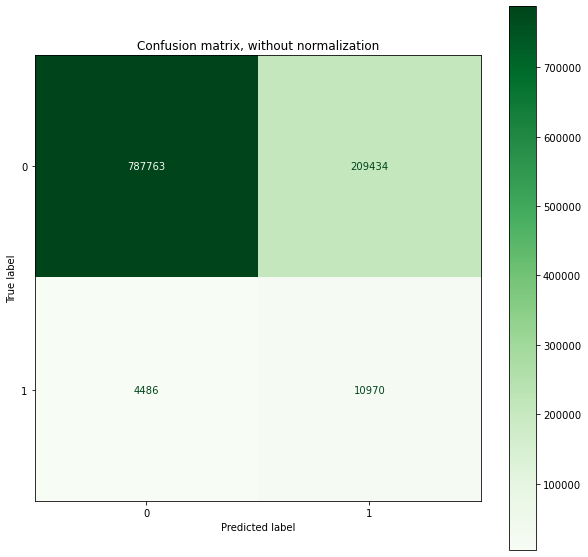

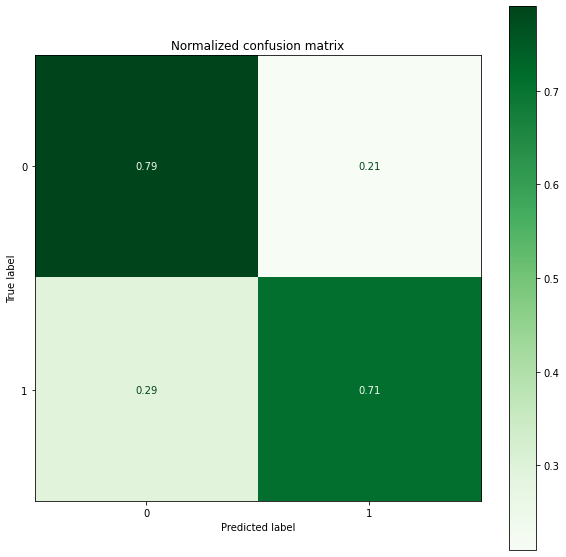

In [27]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

ypred_new_threshold = (ypred_proba[:,1]>thresholds[ix]).astype(int)
evaluate_model(ytest,ypred_new_threshold,ypred_proba)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred_new_threshold,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax = ax)
    ax.set_title(title)